Emma Simmons

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

$\textbf{Question 1}$ $x_{k+2}+\alpha x_{k+1}-(1+\alpha)x_k=\frac{1}{2} h[-\alpha f_{k+2}+(4+3\alpha)f_{k+1}]$

$\textbf{Zero-stability.}$ <br>
$\rho(z)=z^2+\alpha z-(1+\alpha)=0$ <br><br>
$z=\frac{-\alpha \pm \sqrt{\alpha ^2-4(-(1+\alpha))}}{2}=\frac{-\alpha \pm (\alpha +2)}{2}$ <br>
$z_1=-\alpha -1$, $z_2=1$ <br>
To be zero stable,<br>
$\mid 1\mid \leq 1$ and $\mid -\alpha - 1\mid\leq 1$<br>
So,<br>
$\mid -\alpha - 1\mid\leq 1$<br>
$\mid -(\alpha +1) \mid\leq 1$<br>
$\mid \alpha +1\mid\leq 1$<br>
$-1\leq \alpha +1 \leq 1$ <br>
$-2\leq \alpha \leq 0$<br>
Therefore, to be zero-stable, $\alpha \in [-2,0]$.

$\textbf{Consistency.}$ <br>
$\rho(z)=z^2+\alpha z-(1+\alpha)$ <br><br>
$\rho(1)=z^2+\alpha(1)-(1+\alpha)=1+\alpha -1 -\alpha=0$<br><br>
$\rho '(z)=2z+\alpha$<br>
$\sigma(z)=-\alpha z^2+(4+3\alpha)z$<br>
$\rho '(1)=2(1)+\alpha=2+\alpha$<br>
$\sigma(1)=-\alpha (1)^2+(4+3\alpha)(1)=2\alpha +4$<br>
So,<br> $2+\alpha=2\alpha +4$<br>
$\alpha =-2$<br>
Therefore, to be consistent, $\alpha=-2$.

$\textbf{Convergence.}$ <br>
By the Dalquist Theorem, a method that is consistent and zero-stable converges. Therefore, in order to converge, <br>
$\alpha \in \{-2\}\cap[-2,0]$ <br>
So,<br>
$\alpha = -2$

$\textbf{Question 2 Part (a)}$ 

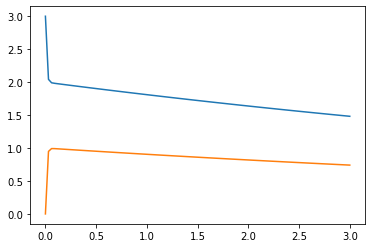

In [2]:
# component 1 of the exact solution
def x1_exact(t):
    return np.exp(-100*t)+(2*np.exp((-1*t)/10))

#component 2 of the exact solution
def x2_exact(t):
    return (-1*np.exp(-100*t))+np.exp((-1*t)/10)

t1=np.linspace(0, 3, 100)
plt.plot(t1, x1_exact(t1))
plt.plot(t1, x2_exact(t1))
plt.show()

$\textbf{Question 2 Part (b)}$ 

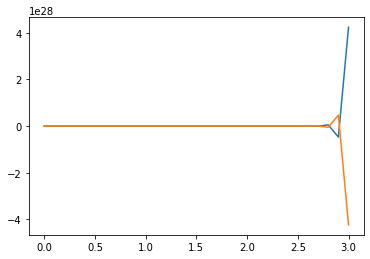

In [3]:
# solves the linear system using forward euler method 
# x0 is initial x value, t0 is initial t value, T is final t value, h is step size
# returns vector with both components of numerical solution 
def fwd_euler(x0, t0, T, h):
    N=int((T-t0)/h)
    t=np.linspace(t0,T,N+1)
    x1=np.zeros(N+1)
    x2=np.zeros(N+1)
    x1[0]=x0[0]
    x2[0]=x0[1]
    for i in range(N):
        x1[i+1]=x1[i]+(h*((-33.4*x1[i])+(66.6*x2[i])))
        x2[i+1]=x2[i]+(h*((33.3*x1[i])+(-66.7*x2[i])))
    return [x1, x2]

t0=0
T=3

# plot for h=1/10
h1=1/10
N1=int((T-t0)/h1)
t=np.linspace(0, 3, N1+1)
plt.plot(t, fwd_euler([3,0], 0, 3, h1)[0])
plt.plot(t, fwd_euler([3,0], 0, 3, h1)[1])
plt.show()

$\textbf{Question 2 Part (c)}$ 

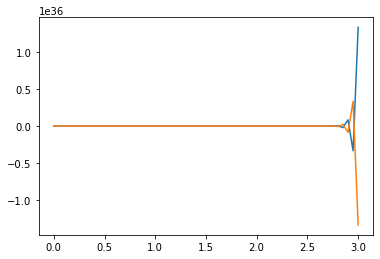

In [4]:
# plot for h=1/20

h2=1/20
N2=int((T-t0)/h2)
t=np.linspace(0, 3, N2+1)
plt.plot(t, fwd_euler([3,0], 0, 3, h2)[0])
plt.plot(t, fwd_euler([3,0], 0, 3, h2)[1])
plt.show()

$\textbf{Question 2 Part (d)}$ 

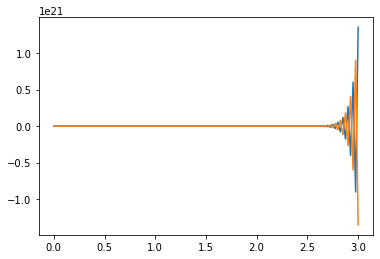

In [5]:
# plot for h=1/40

h3=1/40
N3=int((T-t0)/h3)
t=np.linspace(0, 3, N3+1)
plt.plot(t, fwd_euler([3,0], 0, 3, h3)[0])
plt.plot(t, fwd_euler([3,0], 0, 3, h3)[1])
plt.show()

$\textbf{Question 2 Part (e)}$ 

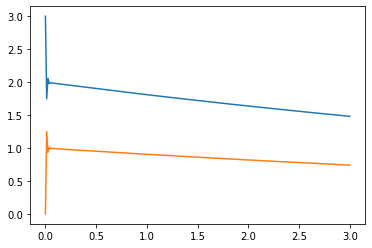

In [6]:
#plot for h=1/80

h4=1/80
N4=int((T-t0)/h4)
t=np.linspace(0, 3, N4+1)
plt.plot(t, fwd_euler([3,0], 0, 3, h4)[0])
plt.plot(t, fwd_euler([3,0], 0, 3, h4)[1])
plt.show()

$\textbf{Question 2 Part (f)}$ 

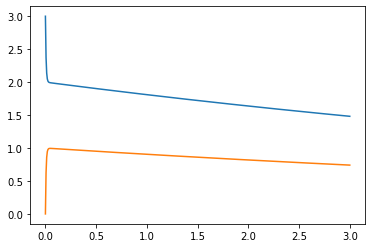

In [7]:
# plot for h=1/160

h5=1/160
N5=int((T-t0)/h5)
t=np.linspace(0, 3, N5+1)
plt.plot(t, fwd_euler([3,0], 0, 3, h5)[0])
plt.plot(t, fwd_euler([3,0], 0, 3, h5)[1])
plt.show()

$\textbf{Question 2 Part (g)}$ 

In [8]:
A = np.array([[-33.4, 66.6],[33.3, -66.7]])

eigvals, eigvecs = la.eig(A)
print(eigvals)

[-1.e-01+0.j -1.e+02+0.j]


In our plots, we can see that the smaller that h gets, the closer to the exact solution and the more stable our approximation becomes. This can be explained with the eigenvalues of $A$, where <br><br>
$A=\begin{pmatrix}
-33.4 & 66.6\\
33.3& -66.7
\end{pmatrix}$ <br><br>
The eigenvalues for $A$ are $\lambda_1=-\frac{1}{10}$ and $\lambda_2=-100$, which indicates slow decay. <br><br>
The region of stability for $\lambda_1$ is <br>
$\mid \lambda_1 h +1\mid\leq 1$ <br>
$-1 \leq \lambda_1 h +1\leq 1$ <br>
$-1 \leq (-\frac{1}{10}) h +1\leq 1$<br>
$0\leq h\leq 20$<br><br>
The region of stability for $\lambda_2$ is <br>
$\mid \lambda_2 h +1\mid\leq 1$ <br>
$-1 \leq \lambda_2 h +1\leq 1$ <br>
$-1 \leq (-100) h +1\leq 1$<br>
$0\leq h\leq \frac{1}{50}$<br><br> 
In order to be stable, one has to take h so that it falls in both stability regions corresponding to $\lambda_1$ and $\lambda_2$, which means $0\leq h\leq \frac{1}{50}$ will give us stability. This is why in our plots we can see that smaller values of h produce stable plots. 

$\textbf{Question 3 Part (a)}$ 

In [9]:
# initial condition
def F(x):
    return np.exp(-100*x**2)


$\textbf{Central Difference in Space and Forward Euler in Time}$ 

In [10]:
# solves the bvp using central difference in space and forward Euler in time
# t0 is initial time, T is final time, x0 is initial x value, xn is final x value
# F is the function for the initial condition u(0,x), h is mesh size, k is time step, sig is the value of sigma
# outputs the solution vector
def bvp_fwd_euler(t0, T, x0, xn, F, h, k, sig): 
    N=int((T-t0)/h)
    M=int((xn-x0)/k)
    t=np.linspace(t0,T,N+1)
    x=np.linspace(x0, xn, M+1)
    u=np.zeros(M+1)
    u0=np.zeros(M+1)
    a=(sig*k)/h**2
    for i in range(0, M+1):
        u0[i]=F(x[i])
    for i in range(0, N):
        for j in range(1, M):
             u[j]=u0[j]+a*(u0[j+1]-2*u0[j]+u0[j-1])
        u[0]=0
        u[M]=0 
        u0, u=u, u0
    return u0
    
    

$\textbf{Central Difference in Space and Backward Euler in Time}$ 

In [11]:
#solves a tridiagonal system
#A is the tridiagonal matrix, d is the column vector
#outputs the x vector that was solved for

def tridiagonal_slvr(A,d):
    n=len(d)
    a=np.zeros(n)
    c=np.zeros(n-1)
    b=np.zeros(n-1)
    for i in range(0,n-2):
        a[i]=A[i][i]
        c[i]=A[i+1][i]
        b[i]=A[i][i+1]
    c[n-2]=A[n-1][n-2]
    b[n-2]=A[n-2][n-1]
    a[n-2]=A[n-2][n-2]
    a[n-1]=A[-1][-1]
    m=np.zeros(n)
    l=np.zeros(n)
    y=np.zeros(n)
    x=np.zeros(n)
    m[0]=a[0]
    for j in range(0,n-1):
        l[j]=(c[j]/m[j])
        m[j+1]=a[j+1]-(l[j]*b[j])
    y[0]=d[0]
    for j in range(1,n):
        y[j]=d[j]-l[j-1]*y[j-1]
    x[n-1]=y[n-1]/m[n-1]
    for j in reversed(range(0,n-1)):
        x[j]=(y[j]-(b[j]*x[j+1]))/m[j]
    return x 

# solves the bvp using central difference in space and backward Euler in time
# t0 is initial time, T is final time, x0 is initial x value, xn is final x value
# F is the function for the initial condition u(0,x), h is mesh size, k is time step, sig is the value of sigma
# outputs the solution vector
def bvp_bwd_euler(t0, T, x0, xn, F, h, k, sig):
    N=int((T-t0)/h)
    M=int((xn-x0)/k)
    t=np.linspace(t0,T,N+1)
    x=np.linspace(x0, xn, M+1)
    u=np.zeros(M+1)
    u0=np.zeros(M+1)
    a=(sig*k)/h**2
    for i in range(0, M+1):
        u0[i] = F(x[i])
    for n in range(0, N):
        A = np.zeros((M+1, M+1))
        b = np.zeros(M+1)
        for i in range(1, M):
            A[i,i-1] = -a
            A[i,i+1] = -a
            A[i,i] = 1 + 2*a
            A[0,0] = A[M,M] = 1+2*a
            A[0,1] = -a
            A[M,M-1] = -a
            b[i] = u0[i]
        b[0] = b[-1]= 0
        u[:] = tridiagonal_slvr(A,b)
        u[0]=0
        u[M]=0
        u0[:] = u
    return u0
    

$\textbf{Central Difference in Space and Trapezoidal Rule (Crank-Nicolson) in Time}$ 

In [12]:
# multiplies a tridiagonal matrix A and a vector x
# A is the matrix, x_vec is the vector x
# outputs the product of Ax
def A_times(A,x_vec):
    Ax=np.zeros(len(x_vec))
    Ax[0]=A[0,0]*x_vec[0]+A[0,1]*x_vec[1]
    Ax[-1]=A[-1,-1]*x_vec[-1]+A[-1,-2]*x_vec[-2]
    for i in range(1,len(Ax) - 1):
        Ax[i]=A[i,i-1]*x_vec[i-1]+A[i,i]*x_vec[i]+A[i,i+1]*x_vec[i+1]
    return Ax

# solves the bvp using central difference in space and Crank-Nicolson in time
# t0 is initial time, T is final time, x0 is initial x value, xn is final x value
# F is the function for the initial condition u(0,x), h is mesh size, k is time step, sig is the value of sigma
# outputs the solution vector
def bvp_crank_nic(t0, T, x0, xn, F, h, k, sig):
    N=int((T-t0)/h)
    M=int((xn-x0)/k)
    t=np.linspace(t0,T,N+1)
    x=np.linspace(x0, xn, M+1)
    u=np.zeros(M+1)
    u0=np.zeros(M+1)
    a=(sig*k)/h**2
    for i in range(0, M+1):
        u0[i] = F(x[i])
    for n in range(0, N):
        A = np.zeros((M+1, M+1))
        b = np.zeros(M+1)
        C= np.zeros((M+1, M+1))
        for i in range(1, M):
            A[i,i-1] = -a
            A[i,i+1] = -a
            A[i,i] = 2 + 2*a
            A[0,0] = A[M,M] = 2+2*a
            A[0,1] = -a
            A[M,M-1] = -a
            C[i,i-1] = a
            C[i,i+1] = a
            C[i,i] = 2-2*a
            C[0,0] = A[M,M] = 2-2*a
            C[0,1] = a
            C[M,M-1] = a
            b[i] = u0[i]
        b[0] = b[-1]= 0
        u[:] = tridiagonal_slvr(A,A_times(C,b))
        u[0]=0
        u[M]=0
        u0[:] = u
    return u0

In [13]:
x0=-1
xn=1
h=0.02


k1=0.1
N1=int((xn-x0)/k1)
x1=np.linspace(x0, xn, N1+1)

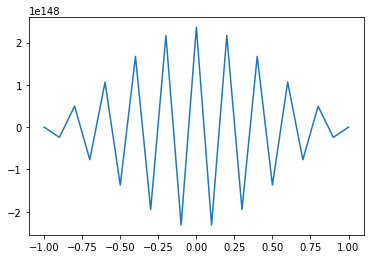

In [14]:
plt.plot(x1, bvp_fwd_euler(0,1,-1,1,F,h,k1,1))

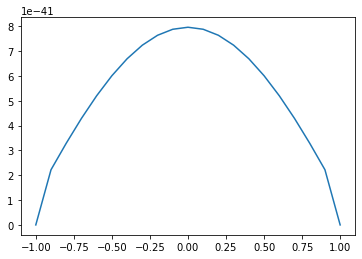

In [15]:
plt.plot(x1, bvp_bwd_euler(0,1,-1,1,F,h,k1,1))

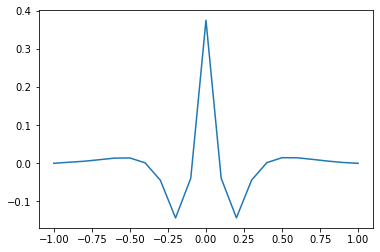

In [16]:
plt.plot(x1,bvp_crank_nic(0,1,-1,1,F,h,k1,1))

$\textbf{Question 3 Part (b)}$ $k=0.01$ and $h=0.02$

In [17]:
k2=0.01
N2=int((xn-x0)/k2)
x2=np.linspace(x0, xn, N2+1)

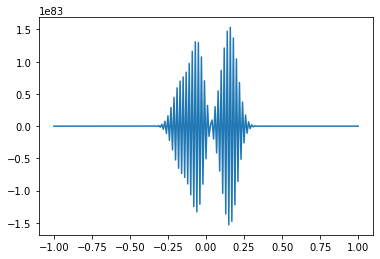

In [18]:
plt.plot(x2, bvp_fwd_euler(0,1,-1,1,F,h,k2,1))

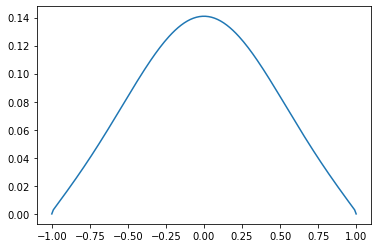

In [19]:
plt.plot(x2, bvp_bwd_euler(0,1,-1,1,F,h,k2,1))

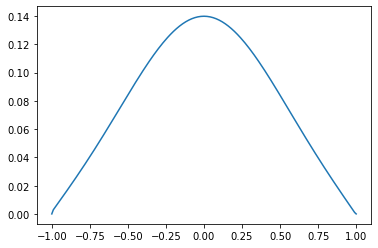

In [20]:
plt.plot(x2,bvp_crank_nic(0,1,-1,1,F,h,k2,1))

$\textbf{Question 3 Part (c)}$ $k=0.001$ and $h=0.02$

In [21]:
k3=0.001
N3=int((xn-x0)/k3)
x3=np.linspace(x0, xn, N3+1)

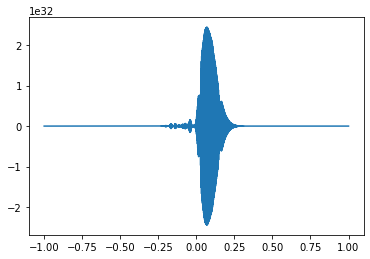

In [22]:
plt.plot(x3, bvp_fwd_euler(0,1,-1,1,F,h,k3,1))

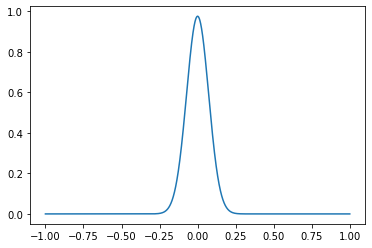

In [23]:
plt.plot(x3, bvp_bwd_euler(0,1,-1,1,F,h,k3,1))

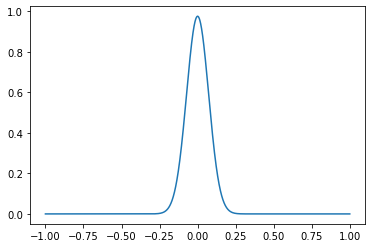

In [24]:
plt.plot(x3,bvp_crank_nic(0,1,-1,1,F,h,k3,1))

$\textbf{Question 3 Part (d)}$ $k=0.0001$ and $h=0.02$

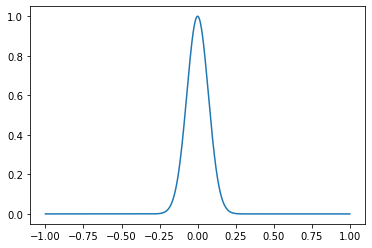

In [25]:
k4=0.0001
h=0.02
N4=int((xn-x0)/k4)
x4=np.linspace(x0, xn, N4+1)
plt.plot(x4, bvp_fwd_euler(0,1,-1,1,F,h,k4,1))

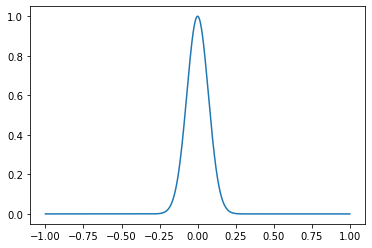

In [26]:
plt.plot(x4, bvp_bwd_euler(0,1,-1,1,F,h,k4,1))

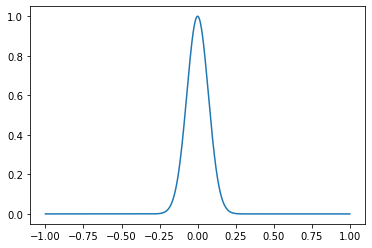

In [27]:
plt.plot(x4,bvp_crank_nic(0,1,-1,1,F,h,k4,1))

$\textbf{Question 3 Part (e)}$

The Forward Euler method is stable only when $\alpha\leq\frac{1}{2}$, this is why for $k=0.1$, $k=0.01$, and $k=0.001$, the plot for this method is very unstable and oscillates. But when $k=0.0001$ is used, $\alpha\leq\frac{1}{2}$ so the plot for Forward Euler at $k=0.0001$ is stable and comes to the same solution as the other two methods. The Backward Euler and Crank-Nicolson methods are unconditonally stable, which is why their plots appear stable for every $k$ value. Additionally, the Forward and Backward Euler Methods have $O(k+h^2)$ accuracy, while the Crank-Nicolson method has $O(k^2+h^2)$ accuracy, which is why we can see that Crank-Nicolson converges to the solution faster. 